## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

#### L1

In [6]:
from keras.regularizers import l1, l2, l1_l2

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for regulizer_ratio in L1_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W0801 21:00:56.336400  2216 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0801 21:00:56.857400  2216 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0801 21:00:58.968400  2216 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 21:00:59.105400  2216 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



Experiment with Regulizer = 0.010000


W0801 21:00:59.570399  2216 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0801 21:01:00.948400  2216 deprecation_wrapper.py:119] From C:\Users\Hui\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0801 21:01:06.290400  2216 deprecation.py:323] From C:\Users\Hui\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 371us/step - loss: 198.8563 - acc: 0.2398 - val_loss: 41.2419 - val_acc: 0.2642
Epoch 2/50
50000/50000 [==============================] - 6s 122us/step - loss: 19.1948 - acc: 0.1208 - val_loss: 7.3258 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 6s 124us/step - loss: 4.1252 - acc: 0.0989 - val_loss: 2.6514 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 6s 123us/step - loss: 2.4866 - acc: 0.0993 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.4626 - acc: 0.0984 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.4626 - acc: 0.0978 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.46

Epoch 2/50
50000/50000 [==============================] - 6s 125us/step - loss: 5.7285 - acc: 0.3622 - val_loss: 5.6426 - val_acc: 0.3840
Epoch 3/50
50000/50000 [==============================] - 6s 127us/step - loss: 5.5832 - acc: 0.3925 - val_loss: 5.5242 - val_acc: 0.4079
Epoch 4/50
50000/50000 [==============================] - 6s 125us/step - loss: 5.4621 - acc: 0.4110 - val_loss: 5.4140 - val_acc: 0.4123
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 5.3519 - acc: 0.4295 - val_loss: 5.2996 - val_acc: 0.4350
Epoch 6/50
50000/50000 [==============================] - 6s 127us/step - loss: 5.2496 - acc: 0.4416 - val_loss: 5.2042 - val_acc: 0.4465
Epoch 7/50
50000/50000 [==============================] - 6s 127us/step - loss: 5.1533 - acc: 0.4537 - val_loss: 5.1217 - val_acc: 0.4494
Epoch 8/50
50000/50000 [==============================] - 6s 127us/step - loss: 5.0628 - acc: 0.4638 - val_loss: 5.0286 - val_acc: 0.4630
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 7s 134us/step - loss: 1.7241 - acc: 0.3961 - val_loss: 1.7030 - val_acc: 0.4035
Epoch 4/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6663 - acc: 0.4144 - val_loss: 1.6507 - val_acc: 0.4239
Epoch 5/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.6178 - acc: 0.4329 - val_loss: 1.6069 - val_acc: 0.4362
Epoch 6/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.5767 - acc: 0.4476 - val_loss: 1.5871 - val_acc: 0.4375
Epoch 7/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5414 - acc: 0.4592 - val_loss: 1.5427 - val_acc: 0.4535
Epoch 8/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.5110 - acc: 0.4694 - val_loss: 1.5228 - val_acc: 0.4647
Epoch 9/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.4856 - acc: 0.4790 - val_loss: 1.5098 - val_acc: 0.4666
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 7s 143us/step - loss: 1.6556 - acc: 0.4176 - val_loss: 1.6405 - val_acc: 0.4247
Epoch 5/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.6065 - acc: 0.4369 - val_loss: 1.6035 - val_acc: 0.4377
Epoch 6/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5680 - acc: 0.4486 - val_loss: 1.5671 - val_acc: 0.4505
Epoch 7/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5335 - acc: 0.4622 - val_loss: 1.5345 - val_acc: 0.4579
Epoch 8/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.5019 - acc: 0.4728 - val_loss: 1.5350 - val_acc: 0.4575
Epoch 9/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4770 - acc: 0.4817 - val_loss: 1.5181 - val_acc: 0.4647
Epoch 10/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4513 - acc: 0.4886 - val_loss: 1.4939 - val_acc: 0.4723
Epoch 11/50
50000/50000 [===================

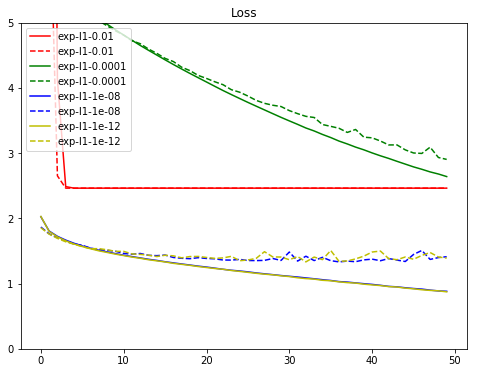

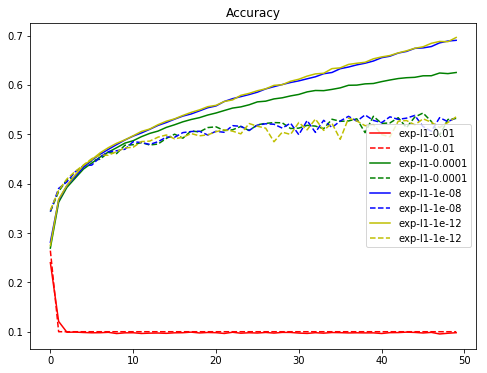

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

#### L1_L2

In [10]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4, l2_ratio=1e-4):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_L2_EXP = [[1e-2, 1e-2], [1e-4, 1e-4], [1e-2, 1e-4], [1e-4, 1e-2]]

In [12]:
results = {}

for reg_l1, reg_l2 in L1_L2_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Regulizer = [{}, {}]".format(reg_l1, reg_l2))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=reg_l1, l2_ratio=reg_l2)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-l1-{}-l2-{}".format(reg_l1, reg_l2)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with Regulizer = [0.01, 0.01]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 172us/step - loss: 6.1494 - acc: 0.2686 - val_loss: 5.9535 - val_acc: 0.3393
Epoch 2/50
50000/50000 [==============================] - 8s 167us/step - loss: 5.8582 - acc: 0.3621 - val_loss: 5.7746 - val_acc: 0.3700
Epoch 3/50
50000/50000 [==============================] - 8s 164us/step - loss: 5.7028 - acc: 0.3895 - val_loss: 5.6298 - val_acc: 0.4041
Epoch 4/50
50000/50000 [==============================] - 8s 163us/step - loss: 5.5746 - acc: 0.4110 - val_loss: 5.5116 - val_acc: 0.4302
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 5.4578 - acc: 0.4315 - val_loss: 5.4102 - val_acc: 0.4339
Epoch 6/50
50000/50000 [==============================] - 8s 164us/step - loss: 5.3510 - acc: 0.4445 - val_loss: 5.3064 - val_acc: 0.4467
Epoch 7/50
50000/50000 [==============================] - 8s 165us/step - loss: 5.2512 - acc: 0.4545 - val_loss: 5.2163 - 

Epoch 2/50
50000/50000 [==============================] - 8s 168us/step - loss: 19.0907 - acc: 0.1177 - val_loss: 7.2690 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 8s 167us/step - loss: 4.1056 - acc: 0.0993 - val_loss: 2.6497 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.4864 - acc: 0.0978 - val_loss: 2.4624 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.4626 - acc: 0.0961 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.4626 - acc: 0.0972 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.4626 - acc: 0.0977 - val_loss: 2.4625 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.4626 - acc: 0.0980 - val_loss: 2.4626 - val_acc: 0.1000
Epoch 9/50
50000/50000 [=========

50000/50000 [==============================] - 8s 164us/step - loss: 13.9692 - acc: 0.3819 - val_loss: 12.9977 - val_acc: 0.3846
Epoch 4/50
50000/50000 [==============================] - 8s 167us/step - loss: 12.1205 - acc: 0.3957 - val_loss: 11.2844 - val_acc: 0.4008
Epoch 5/50
50000/50000 [==============================] - 8s 163us/step - loss: 10.5474 - acc: 0.4052 - val_loss: 9.8353 - val_acc: 0.4042
Epoch 6/50
50000/50000 [==============================] - 8s 162us/step - loss: 9.2070 - acc: 0.4116 - val_loss: 8.5988 - val_acc: 0.4163
Epoch 7/50
50000/50000 [==============================] - 8s 161us/step - loss: 8.0658 - acc: 0.4189 - val_loss: 7.5503 - val_acc: 0.4179
Epoch 8/50
50000/50000 [==============================] - 8s 165us/step - loss: 7.0955 - acc: 0.4228 - val_loss: 6.6630 - val_acc: 0.4218
Epoch 9/50
50000/50000 [==============================] - 8s 162us/step - loss: 6.2691 - acc: 0.4250 - val_loss: 5.8960 - val_acc: 0.4259
Epoch 10/50
50000/50000 [===============

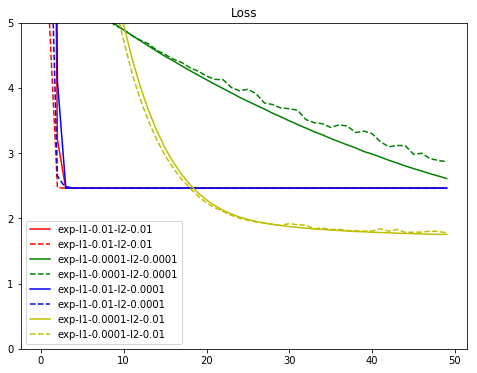

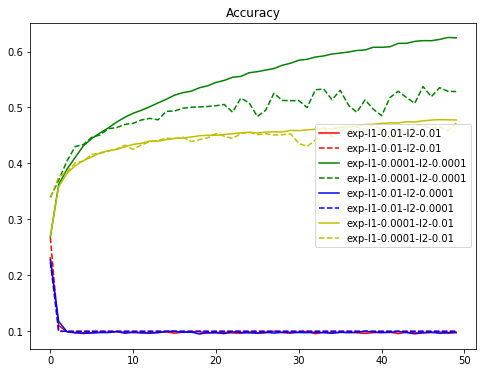

In [13]:
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()